# Studying changes in global trade between 1993 and 2016
## 1. Setup
### Importing the trade data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_trade = pd.read_pickle('../data/df_trade.pkl')
df_trade.head()

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
11,Afghanistan,Argentina,Maize,Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Afghanistan,Argentina,Maize,Import Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,Afghanistan,Australia,"Anise, badian, fennel, coriander",Export Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Afghanistan,Australia,"Anise, badian, fennel, coriander",Export Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Afghanistan,Australia,Apricots,Export Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
def clean_trade(df):
    df_importer = df[df['Element'] == 'Import Quantity']
    df_exporter = df[df['Element'] == 'Export Quantity']
    # Trades as reported by the importing country
    df_importer = df_importer.rename(columns={
        'Reporter Countries': 'Importer',
        'Partner Countries': 'Exporter',
    }).drop(['Element', 'Unit'], axis=1)

    # Trades as reported by the exporting country
    df_exporter = df_exporter.rename(columns={
        'Reporter Countries': 'Exporter',
        'Partner Countries': 'Importer',
    }).drop(['Element', 'Unit'], axis=1)

    # Rename the columns
    cols_i = [name for name in df_importer.columns]
    cols_e = [name for name in df_exporter.columns]
    cols_i[3:] = [col + 'I' for col in cols_i[3:]]
    cols_e[3:] = [col + 'E' for col in cols_e[3:]]
    df_importer.columns = cols_i
    df_exporter.columns = cols_e

    # Merge the dataframes
    df_trades_m = df_importer.merge(df_exporter, how='outer', on=['Importer', 'Exporter', 'Item']).fillna(0)

    # Take the max of both types of reporter
    df_clean_trades = df_trades_m[['Importer', 'Exporter', 'Item']]
    df_importer_reports = df_trades_m[['Y' + str(year) + 'I' for year in range(1993, 2017)]]
    df_importer_reports.columns = [str(year) for year in range(1993, 2017)]
    df_exporter_reports = df_trades_m[['Y' + str(year) + 'E' for year in range(1993, 2017)]]
    df_exporter_reports.columns = [str(year) for year in range(1993, 2017)]
    max_values = df_importer_reports.where(df_importer_reports > df_exporter_reports, df_exporter_reports)
    df_clean_trades[[str(year) for year in range(1993, 2017)]] = max_values
    
    return df_clean_trades

df_trade_q = clean_trade(df_trade[df_trade['Element'].isin(['Import Quantity', 'Export Quantity'])])
df_trade_v = clean_trade(df_trade[df_trade['Element'].isin(['Import Value', 'Export Value'])])

/Users/Niels/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [4]:
df_prod = pd.read_pickle('../data/df_prod.pkl')
df_prod.head()

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Afghanistan,"Almonds, with shell",Area harvested,ha,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,...,12000.0,12000.0,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0
1,Afghanistan,"Almonds, with shell",Yield,hg/ha,16364.0,16364.0,16364.0,16364.0,16364.0,16364.0,...,26234.0,35000.0,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0
2,Afghanistan,"Almonds, with shell",Production,tonnes,9000.0,9000.0,9000.0,9000.0,9000.0,9000.0,...,31481.0,42000.0,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0
3,Afghanistan,"Anise, badian, fennel, coriander",Area harvested,ha,2270.0,2871.0,3000.0,7000.0,4000.0,12000.0,...,28000.0,15000.0,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,26019.0
4,Afghanistan,"Anise, badian, fennel, coriander",Yield,hg/ha,6854.0,6761.0,6667.0,6000.0,6250.0,5917.0,...,6071.0,6000.0,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,6923.0


### Plotting function

In [5]:
def plot_trade(s1, s2, label):
    plt.figure(figsize=(15,5))
    plt.xlabel('Year')

    ax1 = s1.plot(label=label+' Weights')
    ax2 = s2.plot(label=label+' Values', secondary_y=True)

    ax1.set_ylabel('tonnes')
    ax2.set_ylabel('1000 US$')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()

## 2. Global Trade Volume
We start by looking at the difference in trade volume by looking at the change in imports and exports by weight (in tonnes) and by value (in 1000 US$, adjusted to 2014-2016 value) 

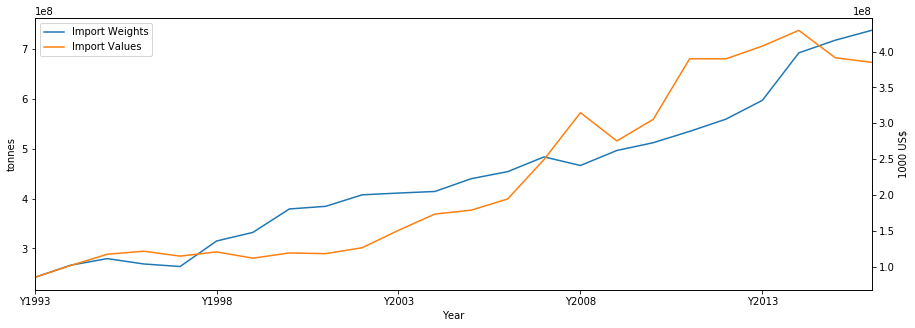

In [6]:
import_w = df_trade[(df_trade['Element'] == 'Import Quantity')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
import_v = df_trade[(df_trade['Element'] == 'Import Value')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(import_w, import_v, 'Import')

Cool. Now exports

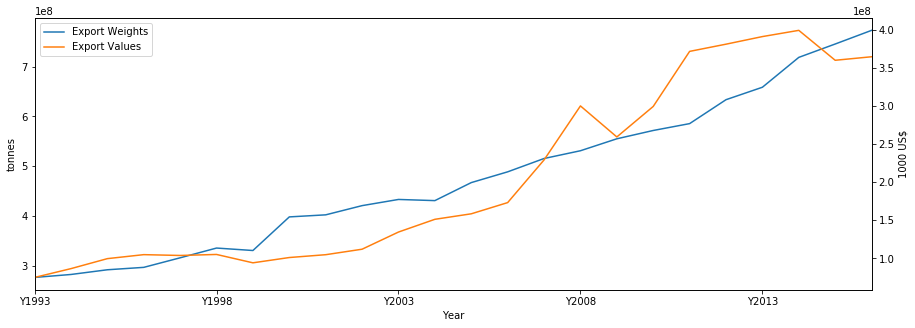

In [7]:
export_w = df_trade[(df_trade['Element'] == 'Export Quantity')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
export_v = df_trade[(df_trade['Element'] == 'Export Value')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(export_w, export_v, 'Export')

We can see some slight disparities between imports and exports. This arises from multiple issues. Let's see the difference.

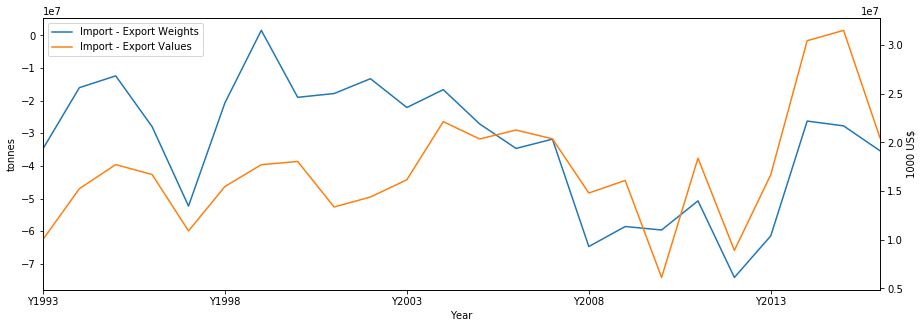

In [8]:
diff_w = import_w - export_w
diff_v = import_v - export_v

plot_trade(diff_w, diff_v, 'Import - Export')

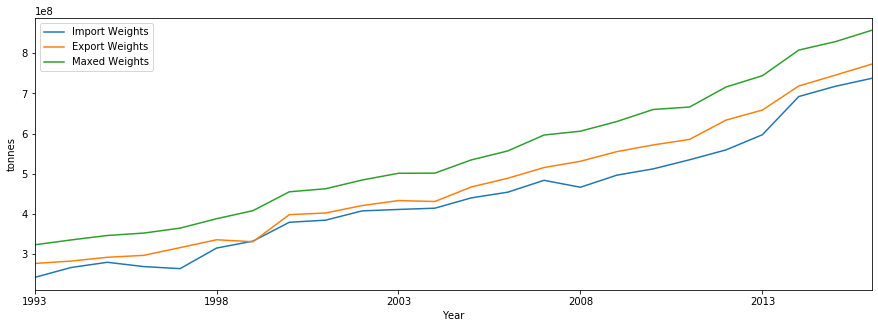

In [9]:
plt.figure(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('tonnes')
ax1 = import_w.plot(label='Import Weights')
ax2 = export_w.plot(label='Export Weights')
ax3 = df_trade_q[[f'{label}' for label in range(1993, 2017)]].sum(axis=0).plot(label='Maxed Weights')
plt.legend()
plt.show()

We can see that every year, the amount of produce exported is greater than the amount of produce imported, but the value of imported produce is greater than the value of exported produce. Interesting.

## 3. Inter/Intra - Continental Trade Volume
Now we want to see how continents trade with each other. We define for this the following continents

* Africa
* Americas
* Asia
* Europe
* Oceania

I use the FAO's data to seperate the countries in the matrix into continents.

http://www.fao.org/faostat/en/#definitions

In [10]:
country_groups = pd.read_csv('../data/FAOSTAT_data_11-19-2019.csv')
country_groups.head()

,Country Group Code,Country Group,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code
0,5100,Africa,4,Algeria,12.0,DZ,DZA
1,5100,Africa,7,Angola,24.0,AO,AGO
2,5100,Africa,53,Benin,204.0,BJ,BEN
3,5100,Africa,20,Botswana,72.0,BW,BWA
4,5100,Africa,24,British Indian Ocean Territory,86.0,IO,IOT


In [11]:
african_countries = set(country_groups[country_groups['Country Group'] == 'Africa']['Country'])
american_countries = set(country_groups[country_groups['Country Group'] == 'Americas']['Country'])
asian_countries = set(country_groups[country_groups['Country Group'] == 'Asia']['Country'])
european_countries = set(country_groups[country_groups['Country Group'] == 'Europe']['Country'])
oceanian_countries = set(country_groups[country_groups['Country Group'] == 'Oceania']['Country'])

continents = [african_countries, american_countries, asian_countries, european_countries, oceanian_countries]
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

We start by looking at how inter and intra continental has evolved between 1993 and 2016.

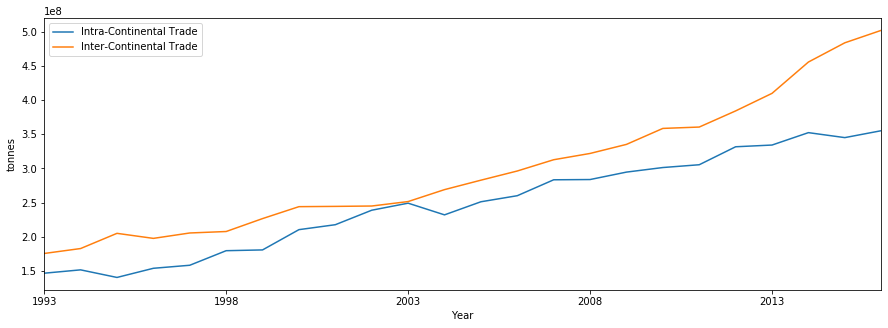

In [12]:
df_intra_cont_trade = pd.DataFrame(columns=df_trade_q.columns)
df_inter_cont_trade = pd.DataFrame(columns=df_trade_q.columns)

for c in continents:
    df_intra_cont_trade = df_intra_cont_trade.append(df_trade_q[(df_trade_q['Importer'].isin(c)) &
                                                                (df_trade_q['Exporter'].isin(c))])

for c1 in continents:
    for c2 in continents:
        if c1 != c2:
            df_inter_cont_trade = df_inter_cont_trade.append(df_trade_q[(df_trade_q['Importer'].isin(c1)) &
                                                                    (df_trade_q['Exporter'].isin(c2))])

df_intra_cont_trade_sums = df_intra_cont_trade[[str(label) for label in range(1993, 2017)]].sum(axis=0)
df_inter_cont_trade_sums = df_inter_cont_trade[[str(label) for label in range(1993, 2017)]].sum(axis=0)

plt.figure(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('tonnes')
df_intra_cont_trade_sums.plot(label='Intra-Continental Trade')
df_inter_cont_trade_sums.plot(label='Inter-Continental Trade')
plt.legend()
plt.show()

At first glance, their increase looks more or less similar. But these plots are on different scales. We hence look at what proportion of imports were from other continents, compared to the same continent.

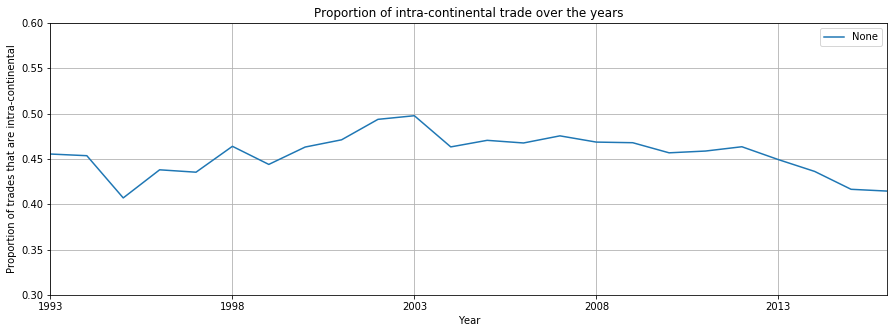

In [31]:
df_trade_sums = df_intra_cont_trade_sums + df_inter_cont_trade_sums

df_intra_cont_perc = df_intra_cont_trade_sums/df_trade_sums

plt.figure(figsize=(15,5))
plt.title('Proportion of intra-continental trade over the years')
plt.xlabel('Year')
plt.ylabel('Proportion of trades that are intra-continental')
df_intra_cont_perc.plot()
plt.ylim([0.3, 0.6])
plt.grid()
plt.legend()
plt.show()

We notice that despite some fluctuations, and a more stable decrease between 2003 and 2016, the proportion of intra and inter continental trade stays quite stable. We perform an Augmented Dickey-Fuller Unit Root Test, which tests whether a time series is stationary or not.

In [35]:
from statsmodels.tsa.stattools import adfuller

print(df_intra_cont_perc.to_numpy())

stat, p, lags, obs, crit, t = adfuller(df_intra_cont_perc.to_numpy())
print(f'stat={round(stat, 3)}, p={round(p, 3)}')

[0.45536966 0.45353699 0.40694073 0.43796297 0.43532184 0.46388766
 0.44391655 0.4630958  0.47107389 0.49366151 0.49766298 0.46323976
 0.47049211 0.46757737 0.47543315 0.4685486  0.46787027 0.45670917
 0.45867053 0.46341568 0.44925552 0.43617052 0.4164421  0.41447042]
stat=0.856, p=0.992


In [38]:
from statsmodels.tsa.stattools import adfuller

stat, p, lags, obs, crit, t = adfuller(df_intra_cont_perc[:10].to_numpy())
print(f'stat={round(stat, 3)}, p={round(p, 3)}')

stat=1.185, p=0.996


In [39]:
from statsmodels.tsa.stattools import adfuller

stat, p, lags, obs, crit, t = adfuller(df_intra_cont_perc[10:].to_numpy())
print(f'stat={round(stat, 3)}, p={round(p, 3)}')

stat=4.692, p=1.0


We can clearly reject that the data is stationary.

We now want to look more precisely at regions. Instead of considering continents, we consider the regions:

* Africa
    * Eastern Africa
    * Middle Africa
    * Northern Africa
    * Southern Africa
    * Western Africa
* Americas
    * Northern America
    * Central America
    * Caribbean
    * South America
* Asia
    * Central Asia
    * Eastern Asia
    * Southern Asia
    * South-Eastern Asia
    * Western Asia
* Europe
    * Eastern Europe
    * Northern Europe
    * Southern Europe
    * Western Europe
* Oceania
    * Australia and New Zealand
    * Melanesia
    * Polynesia

In [41]:
region_names = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa',
                'Northern America', 'Central America', 'Caribbean', 'South America',
                'Central Asia', 'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia',
                'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe',
                'Australia and New Zealand', 'Melanesia', 'Polynesia']
regions = [set(country_groups[country_groups['Country Group'] == region]['Country']) for region in region_names]

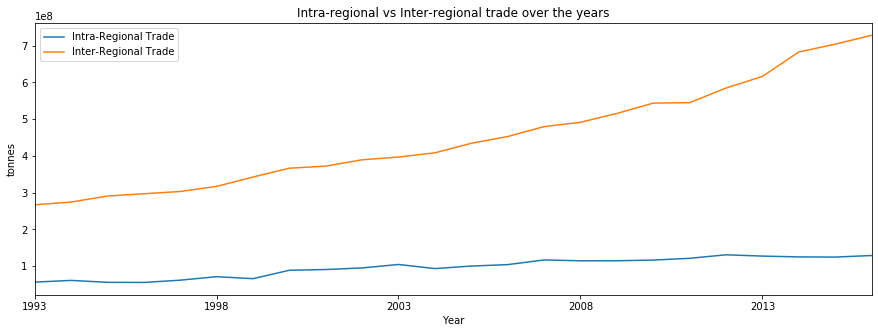

In [42]:
df_intra_reg_trade = pd.DataFrame(columns=df_trade_q.columns)
df_inter_reg_trade = pd.DataFrame(columns=df_trade_q.columns)

for r in regions:
    df_intra_reg_trade = df_intra_reg_trade.append(df_trade_q[(df_trade_q['Importer'].isin(r)) &
                                                              (df_trade_q['Exporter'].isin(r))])

for r1 in regions:
    for r2 in regions:
        if r1 != r2:
            df_inter_reg_trade = df_inter_reg_trade.append(df_trade_q[(df_trade_q['Importer'].isin(r1)) &
                                                                      (df_trade_q['Exporter'].isin(r2))])

df_intra_reg_trade_sums = df_intra_reg_trade[[str(label) for label in range(1993, 2017)]].sum(axis=0)
df_inter_reg_trade_sums = df_inter_reg_trade[[str(label) for label in range(1993, 2017)]].sum(axis=0)

plt.figure(figsize=(15,5))
plt.title('Intra-regional vs Inter-regional trade over the years')
plt.xlabel('Year')
plt.ylabel('tonnes')
df_intra_reg_trade_sums.plot(label='Intra-Regional Trade')
df_inter_reg_trade_sums.plot(label='Inter-Regional Trade')
plt.legend()
plt.show()

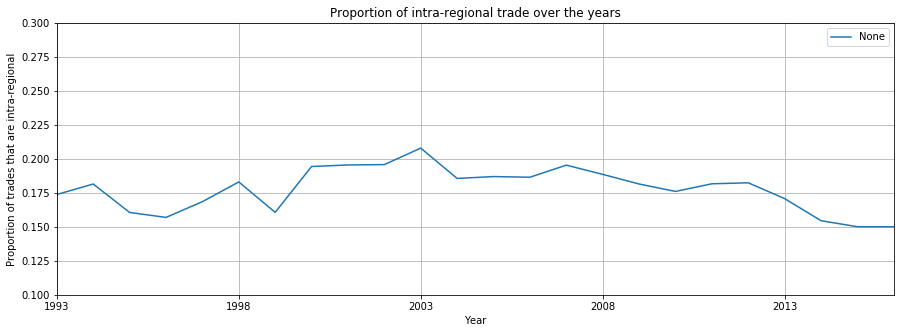

In [43]:
df_intra_reg_perc = df_intra_reg_trade_sums/df_trade_sums

plt.figure(figsize=(15,5))
plt.title('Proportion of intra-regional trade over the years')
plt.xlabel('Year')
plt.ylabel('Proportion of trades that are intra-regional')
df_intra_reg_perc.plot()
plt.ylim([0.1, 0.3])
plt.grid()
plt.legend()
plt.show()

We again perform an Augmented Dickey-Fuller Unit Root Test, which tests whether a time series is stationary or not.

In [45]:
from statsmodels.tsa.stattools import adfuller

print(df_intra_reg_perc.to_numpy())

stat, p, lags, obs, crit, t = adfuller(df_intra_reg_perc.to_numpy())
print(f'stat={round(stat, 3)}, p={round(p, 3)}')

[0.17381006 0.18152572 0.16060851 0.15694544 0.16853492 0.18304569
 0.16067955 0.19440447 0.19553446 0.19581072 0.20793341 0.18562154
 0.18700476 0.18650215 0.19541452 0.18861504 0.18153139 0.17605975
 0.1816921  0.18240808 0.17078    0.15452138 0.15009251 0.15007626]
stat=1.09, p=0.995


We can conclude again that the trend is not stationary.

## 4 Looking at Specific Items

What items show the most change in how they are traded?

We only look at the 100 items that are the most traded.

In [79]:
popular_items = df_trade_q.groupby('Item').sum().sort_values(by='2016', ascending=False)[:100]
popular_items.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Item,,,,,,,,,,,,,,,,,,,,,
Wheat,98566530.0,96561209.0,97325352.0,101089581.0,104265375.0,111910242.0,115594731.0,124919376.0,120032635.0,132602943.0,...,139622011.0,141944382.0,158534782.0,155518975.0,157219437.0,176312889.0,178325555.0,189827132.0,180926053.0,204008533.0
Maize,68495131.0,65938061.0,77980755.0,71543027.0,74075793.0,77399830.0,80675058.0,87217106.0,89289764.0,93648763.0,...,116897439.0,109732776.0,107899332.0,118326832.0,118759897.0,131229989.0,133922416.0,157203488.0,158662764.0,167935382.0
Soybeans,31088058.0,32737824.0,34184140.0,36076151.0,43340270.0,40432187.0,43880675.0,51485212.0,61228271.0,59762497.0,...,80440959.0,85448246.0,86840026.0,101807408.0,97685922.0,102659394.0,109940784.0,123081082.0,137070743.0,142010807.0
"Oil, palm",9399348.0,11418431.0,10621548.0,11431108.0,9851772.0,11831957.0,14262120.0,15721688.0,18922654.0,20551947.0,...,32302602.0,36946558.0,39066038.0,40409632.0,41234479.0,43661115.0,46847891.0,47852209.0,52695324.0,46381515.0
Barley,16056615.0,19454445.0,16479574.0,17646885.0,17159010.0,17854631.0,20975843.0,26592464.0,23529086.0,25781246.0,...,28076649.0,29251954.0,27748675.0,29098693.0,28281362.0,30918574.0,33171552.0,36799654.0,40968494.0,37406115.0


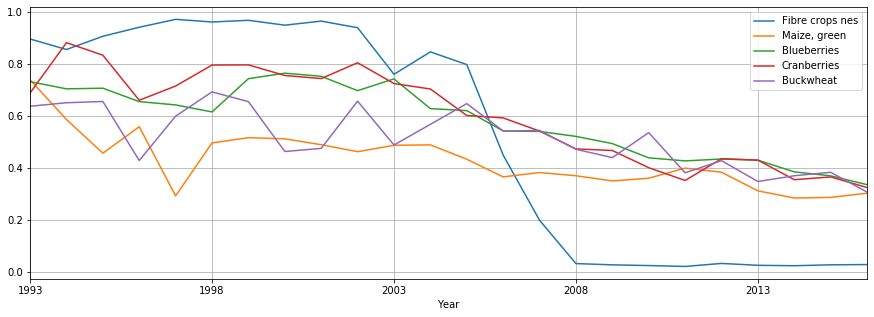

In [80]:
items_kept = list(popular_items.index)

def change_sort(item):
    row = item[1]
    if row.isnull().values.any():
        return 0
    else:
        return np.abs(row['1993'] - row['2016'])

df_item_intra_reg = df_intra_reg_trade[df_intra_reg_trade['Item'].isin(items_kept)]\
                            [['Item'] + [f'{label}' for label in range(1993, 2017)]].groupby('Item').sum()

df_item_inter_reg = df_inter_reg_trade[df_inter_reg_trade['Item'].isin(items_kept)]\
                            [['Item'] + [f'{label}' for label in range(1993, 2017)]].groupby('Item').sum()

df_item_trade = df_item_intra_reg + df_item_inter_reg

df_item_intra_regional_perc = df_item_intra_reg.div(df_item_trade)

item_intra_regional_perc = []
for index, row in df_item_intra_regional_perc.iterrows():
    item_intra_regional_perc.append((
        row.name,
        row
    ))

item_intra_regional_perc.sort(key=change_sort, reverse=True)

plt.figure(figsize=(15,5))
plt.xlabel('Year')
for name, row in item_intra_regional_perc[0:5]:
    row.plot(label=name)
plt.grid()
plt.legend()
plt.show()

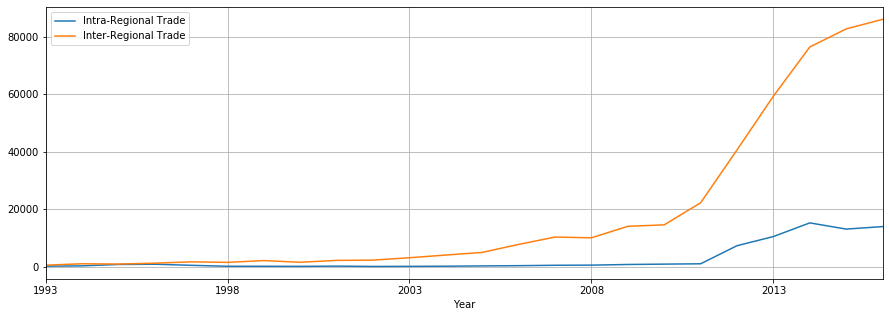

In [100]:
quinoa_intra = df_item_intra_reg[df_item_intra_reg.index == 'Quinoa']
quinoa_inter = df_item_inter_reg[df_item_inter_reg.index == 'Quinoa']

plt.figure(figsize=(15,5))
plt.xlabel('Year')
quinoa_intra.squeeze().plot(label='Intra-Regional Trade')
quinoa_inter.squeeze().plot(label='Inter-Regional Trade')
plt.grid()
plt.legend()
plt.show()

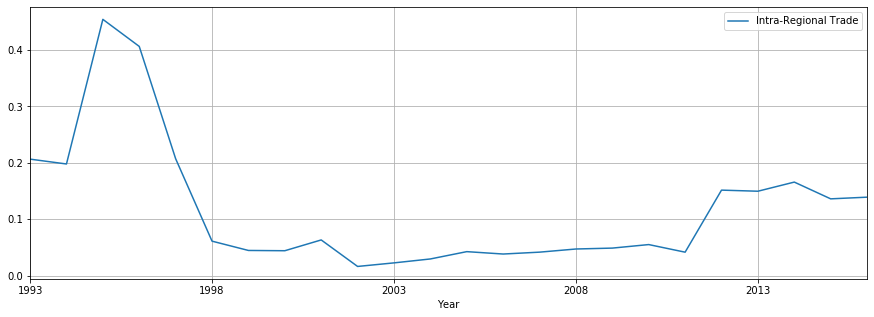

In [102]:
quinoa_intra_perc = quinoa_intra/(quinoa_intra + quinoa_inter)

plt.figure(figsize=(15,5))
plt.xlabel('Year')
quinoa_intra_perc.squeeze().plot(label='Intra-Regional Trade')
plt.grid()
plt.legend()
plt.show()

In [118]:
df_prod = pd.read_pickle('../data/df_prod.pkl')
df_quinoa_prod = df_prod[(df_prod['Item'] == 'Quinoa') & (df_prod['Element'] == 'Production')]

def rename_cols(year):
    return ''.join([c for c in year if str.isdigit(c)])

df_quinoa_sum = df_quinoa_prod[[f'Y{label}' for label in range(1993, 2017)]].rename(columns=rename_cols).sum()

1993    36779.0
1994    36456.0
1995    32995.0
1996    40123.0
1997    50358.0
dtype: float64

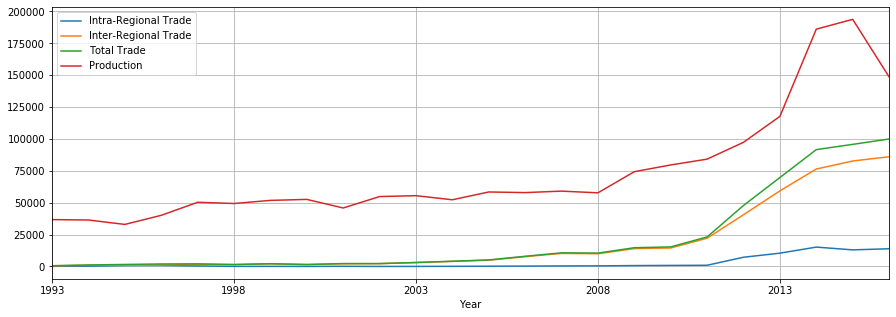

In [120]:
quinoa_intra = df_item_intra_reg[df_item_intra_reg.index == 'Quinoa']
quinoa_inter = df_item_inter_reg[df_item_inter_reg.index == 'Quinoa']
quinoa_trade = quinoa_intra + quinoa_inter

plt.figure(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Tonnes')
quinoa_intra.squeeze().plot(label='Intra-Regional Trade')
quinoa_inter.squeeze().plot(label='Inter-Regional Trade')
quinoa_trade.squeeze().plot(label='Total Trade')
df_quinoa_sum.squeeze().plot(label='Production')
plt.grid()
plt.legend()
plt.show()

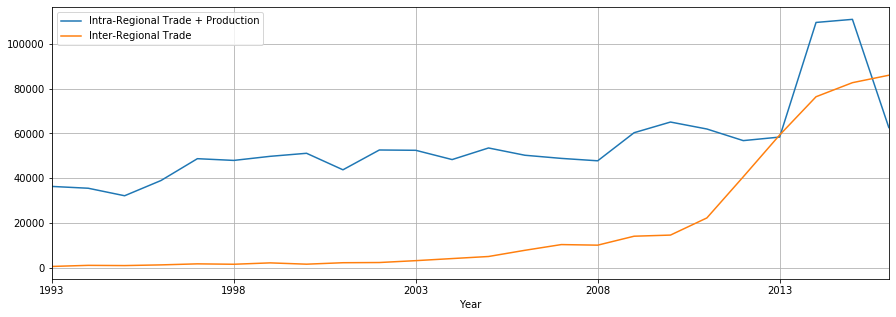

In [114]:
quinoa_intra_prod = df_quinoa_sum - quinoa_inter

plt.figure(figsize=(15,5))
plt.xlabel('Year')
quinoa_intra_prod.squeeze().plot(label='Intra-Regional Trade + Production')
quinoa_inter.squeeze().plot(label='Inter-Regional Trade')
plt.grid()
plt.legend()
plt.show()

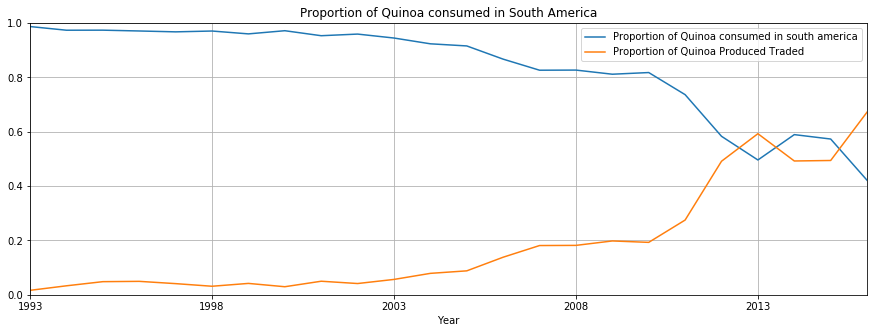

In [123]:
quinoa_intra_perc = quinoa_intra_prod/(quinoa_intra_prod + quinoa_inter)
# Remove second hand trade
quinoa_trade_perc = quinoa_trade/df_quinoa_sum

plt.figure(figsize=(15,5))
plt.xlabel('Year')
plt.ylim(0, 1)
plt.title('Proportion of Quinoa consumed in South America')
quinoa_intra_perc.squeeze().plot(label='Proportion of Quinoa consumed in south america')
quinoa_trade_perc.squeeze().plot(label='Proportion of Quinoa Produced Traded')
plt.grid()
plt.legend()
plt.show()

In [57]:
quinoa_exports_w = df_trade[(df_trade['Item'] == 'Quinoa') & (df_trade['Element'] == 'Export Quantity')]
quinoa_imports_w = df_trade[(df_trade['Item'] == 'Quinoa') & (df_trade['Element'] == 'Import Quantity')]
quinoa_trade = df_trade_q[(df_trade_q['Item'] == 'Quinoa')]
quinoa_trade.head()

,Importer,Exporter,Item,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
215,Afghanistan,Netherlands,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
847,Albania,France,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,Albania,Greece,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1208,Albania,Italy,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1363,Albania,Peru,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
quinoa_exports_sum = quinoa_exports_w[[f'Y{label}' for label in range(1993, 2017)]].sum()
quinoa_imports_sum = quinoa_imports_w[[f'Y{label}' for label in range(1993, 2017)]].sum()
quinoa_trade_sum = quinoa_trade[[f'{label}' for label in range(1993, 2017)]].sum()

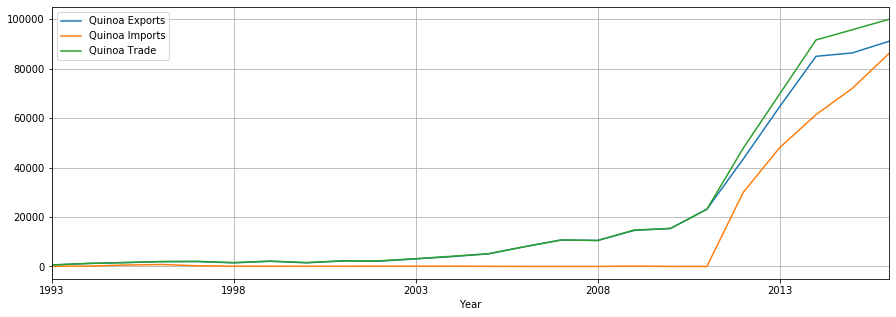

In [59]:
plt.figure(figsize=(15,5))
plt.xlabel('Year')
quinoa_exports_sum.plot(label='Quinoa Exports')
quinoa_imports_sum.plot(label='Quinoa Imports')
quinoa_trade_sum.plot(label='Quinoa Trade')
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.xlabel('Year')
quinoa_exports_sum.plot(label='Quinoa Exports')
quinoa_imports_sum.plot(label='Quinoa Imports')
plt.grid()
plt.legend()
plt.show()

Fruit, tropical fresh nes:

FRUIT, FRESH NES Including inter alia: azarole (Crataegus azarolus); babaco (Carica pentagona); elderberry (Sambucus nigra); jujube (Zizyphus jujuba); litchi (Nephelium litchi); loquat (Eriobotrya japonica); medlar (Mespilus germanica); pawpaw (Asimina triloba); pomegranate (Punica granatum); prickly pear (Opuntia ficus-indica); rose hips (Rosa spp.); rowanberry (Sorbus aucuparia); service-apple (Sorbus domestica); tamarind (Tamarindus indica); tree-strawberry (Arbutus unedo)

Other fresh fruit that are not identified separately because of their minor relevance at the international level. Because of their limited local importance, some countries report fresh fruit under this heading that are classified separately by FAO.

http://www.fao.org/waicent/faoinfo/economic/faodef/fdef08e.htm#8.08

## 5 China and Imports

What are China's biggest trade partners, and how are they changing?

In [ ]:
print(list(df_trade['Reporter Countries'].value_counts().index))

In [ ]:
china_names = ['China, mainland', 'China, Hong Kong SAR', 'China, Taiwan Province of', 'China, Macao SAR']

df_china_trade_w = df_trade[(df_trade['Reporter Countries'] == 'China, mainland') &
                            (df_trade['Element'] == 'Import Quantity')]
df_china_trade_v = df_trade[(df_trade['Reporter Countries'] == 'China, mainland') &
                            (df_trade['Element'] == 'Import Value')]

### 5.1 The Evolution of Chinese Imports

We start by looking at how Chinese imports changed over the past 20 years.

In [ ]:
china_trades_w = df_china_trade_w[[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
china_trades_v = df_china_trade_v[[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(china_trades_w, china_trades_v, 'Chinese Imports')

Unsurprisingly, Chinese imports have greatly increased in the past 20 years

### 5.2 Trades with each continent

First, let's look at how much trade China does with countries on each continent

In [ ]:
def sort_stuf(a):
    return a[1]['Y2016']


def group_trades(trade_df, sets_of_partners):
    """
    trade_df: the df to use
    sets_of_partners: list of sets of countries, with names
    """
    country_trades = []
    for name, countries in sets_of_partners:
        country_trades.append((
            name,
            trade_df[(trade_df['Partner Countries'].isin(countries))][
                    [f'Y{label}' for label in range(1993, 2017)]
                ].sum(axis=0)
        ))
    return country_trades
    

def plot_results(trade_sets, unit):
    plt.figure(figsize=(15,5))
    plt.xlabel('Year')
    plt.ylabel(f'Exports to China [{unit}]')
    for name, trades in trade_sets:
        trades_with_country = trades
        # Plot total trades
        trades_with_country.plot(label=f'Trade with {name}')

    plt.grid()
    plt.legend()
    plt.show()
    

def plot_partners(sets_of_partners, n):
    """
    sets_of_partners: list of sets of countries, with names
    n: the number of sets of countries to be plotted, the most important will be ploted
    """
    china_country_trades_w = group_trades(df_china_trade_w, sets_of_partners)
    china_country_trades_v = group_trades(df_china_trade_v, sets_of_partners)
    
    china_country_trades_w.sort(key=sort_stuf, reverse=True)
    china_country_trades_v.sort(key=sort_stuf, reverse=True)
    
    plot_results(china_country_trades_w[:n], 'tonnes')
    plot_results(china_country_trades_v[:n], 'US$, in Millions')
    
    trade_proportion_w = [(name, weights/china_trades_w) for (name, weights) in china_country_trades_w]
    trade_proportion_v = [(name, weights/china_trades_v) for (name, weights) in china_country_trades_v]

    trade_proportion_w.sort(key=sort_stuf, reverse=True)
    trade_proportion_v.sort(key=sort_stuf, reverse=True)
    
    plot_results(trade_proportion_w[:n], '% of total volume')
    plot_results(trade_proportion_v[:n], '% of total value')

In [ ]:
p = [(c_name, c) for (c_name, c) in zip(continent_names, continents)]
plot_partners(p, 5)

We can see that the American continent is China's main agricultural trade partner. In terms of proportion of total value, there has been an increase from between 50% and 60% in the 90s to around 70% in the 2010s.  Interestingly, trade with Asian countries has gone from around 30% of its total value in 1993 to around 13% in 2016.

### 5.3 Regions

We refine our search to which regions are most import to China.

In [ ]:
p = [(c_name, c) for (c_name, c) in zip(region_names, regions)]
plot_partners(p, 5)

South America has gone from a tiny playa in the 90s to one of the two main partners in 2016.


### 5.4 Countries

In [ ]:
all_countries = african_countries.union(american_countries)\
                                    .union(asian_countries)\
                                    .union(european_countries)\
                                    .union(oceanian_countries)

p = [(c, {c}) for c in all_countries]
plot_partners(p, 5)